<img src="https://cekumagroup.cas.lehigh.edu/sites/cekumagroup.cas2.lehigh.edu/files/image10.jpg "/>

# About the dataset 

* NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. The agency responds to the request, addresses it, and then closes it.
    
# Data Manipulation Tasks:
Analysis Tasks to be performed:

(Perform a service request data analysis of New York City 311 calls) 

1. Import a 311 NYC service request.
2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)
3. Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.
4. Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.
5.  Perform a statistical test for the following:

*Whether the average response time across complaint types is similar or not (overall)*

*Are the type of complaint or service requested and location related?*

**Happy reading!**

* * *

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar
from plotly.offline import iplot
import scipy.stats as stat
%matplotlib inline

In [2]:
# Load the dataset
NY311 = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv',low_memory=False)

In [3]:
#View the header and set the option to view all columns
#NY311.head()
pd.set_option('display.max_columns',None)
NY311.sample(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
267811,30536956,05-03-15 20:01,05-03-15 23:06,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,NaN,NaN,NaN,NaN,WEST 141 STREET,HAMILTON PLACE,INTERSECTION,NEW YORK,NaN,Precinct,Closed,05-04-15 4:01,The Police Department responded to the complai...,05-03-15 23:06,09 MANHATTAN,MANHATTAN,997951.0,239166.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.823120,-73.950497,"(40.8231203785256, -73.95049657580658)"
126821,31452437,09-03-15 16:03,09-03-15 18:26,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10032.0,656 WEST 162 STREET,WEST 162 STREET,FT WASHINGTON AVENUE,RIVERSIDE DRIVE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,09-04-15 0:03,The Police Department responded to the complai...,09-03-15 18:26,12 MANHATTAN,MANHATTAN,999514.0,244631.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.838118,-73.944837,"(40.83811767058312, -73.9448368284078)"
79383,31750893,10/15/2015 12:19:54 AM,10/15/2015 01:19:43 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11385.0,1882 GREENE AVENUE,GREENE AVENUE,ONDERDONK AVENUE,WOODWARD AVENUE,NaN,NaN,ADDRESS,RIDGEWOOD,NaN,Precinct,Closed,10/15/2015 08:19:54 AM,The Police Department issued a summons in resp...,10/15/2015 01:19:43 AM,05 QUEENS,QUEENS,1009062.0,196877.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.707024,-73.910507,"(40.70702385661114, -73.91050726850848)"
193931,31009115,07-05-15 12:51,07-05-15 14:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11421.0,85-15 86 STREET,86 STREET,85 ROAD,86 AVENUE,NaN,NaN,ADDRESS,WOODHAVEN,NaN,Precinct,Closed,07-05-15 20:51,The Police Department responded and upon arriv...,07-05-15 14:26,09 QUEENS,QUEENS,1023393.0,192506.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694975,-73.858843,"(40.69497470824828, -73.85884322795904)"
40305,32033444,11/20/2015 09:07:32 PM,11/20/2015 09:28:28 PM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,10472.0,1934 GLEASON AVENUE,GLEASON AVENUE,VIRGINIA AVENUE,PUGSLEY AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,11/21/2015 05:07:32 AM,The Police Department responded to the complai...,11/20/2015 09:28:28 PM,09 BRONX,BRONX,1023096.0,241978.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.830764,-73.859628,"(40.83076371424559, -73.85962837427383)"


In [4]:
#Check shape and size of data
NY311.shape

(300698, 53)

In [5]:
# Looking for features (columns) 

NY311.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [6]:
# Check the data types of each entry
NY311.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [7]:
NY311['Complaint Type'].value_counts().head(5)

Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Name: Complaint Type, dtype: int64

In [8]:
NY311['Resolution Description'].value_counts().head(4)

The Police Department responded to the complaint and with the information available observed no evidence of the violation at that time.    90490
The Police Department responded to the complaint and took action to fix the condition.                                                     61624
The Police Department responded and upon arrival those responsible for the condition were gone.                                            58031
The Police Department responded to the complaint and determined that police action was not necessary.                                      38211
Name: Resolution Description, dtype: int64

In [9]:
#Check unique number of complains
NY311['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

In [10]:
NY311['Complaint Type'].nunique()

24

In [11]:
# Determine the frequency of occurence of the different complain
complain_frequency = NY311['Complaint Type'].value_counts()
complain_frequency = complain_frequency.to_frame()
complain_frequency = complain_frequency.rename(columns={'Complaint Type':'Counts'})
complain_frequency

,Counts
Blocked Driveway,77044
Illegal Parking,75361
Noise - Street/Sidewalk,48612
Noise - Commercial,35577
Derelict Vehicle,17718
Noise - Vehicle,17083
Animal Abuse,7778
Traffic,4498
Homeless Encampment,4416
Noise - Park,4042


In [12]:
# In terms of percentage of occurrance, we can do that as:
complain_frequency['Percentage'] = np.around((complain_frequency.Counts/complain_frequency.Counts.sum())*100,decimals=3)
complain_frequency

,Counts,Percentage
Blocked Driveway,77044,25.622
Illegal Parking,75361,25.062
Noise - Street/Sidewalk,48612,16.166
Noise - Commercial,35577,11.831
Derelict Vehicle,17718,5.892
Noise - Vehicle,17083,5.681
Animal Abuse,7778,2.587
Traffic,4498,1.496
Homeless Encampment,4416,1.469
Noise - Park,4042,1.344


In [13]:
# We can drop the complains that are less than 1%
complain_frequency = complain_frequency[complain_frequency.Percentage>1.0]
complain_frequency = complain_frequency.reset_index()
complain_frequency = complain_frequency.rename(columns={'index':'Complaint Type'})
complain_frequency

,Complaint Type,Counts,Percentage
0,Blocked Driveway,77044,25.622
1,Illegal Parking,75361,25.062
2,Noise - Street/Sidewalk,48612,16.166
3,Noise - Commercial,35577,11.831
4,Derelict Vehicle,17718,5.892
5,Noise - Vehicle,17083,5.681
6,Animal Abuse,7778,2.587
7,Traffic,4498,1.496
8,Homeless Encampment,4416,1.469
9,Noise - Park,4042,1.344


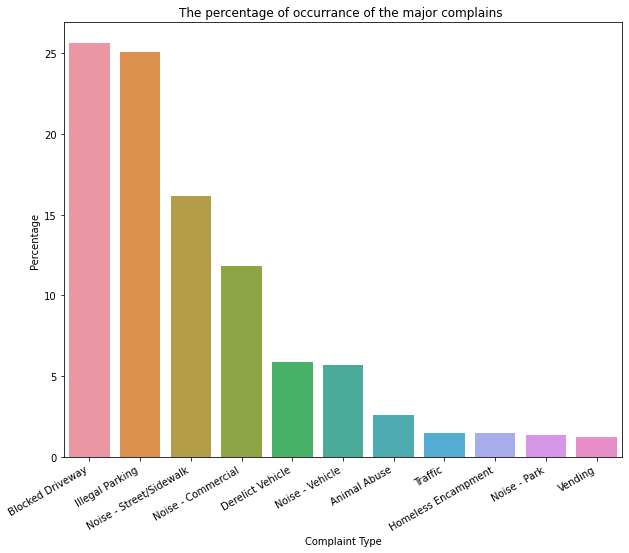

<Figure size 432x288 with 0 Axes>

In [14]:
# Visualization the complain occurance as a plot

plt.figure(figsize=(10,8))
complaintype = sns.barplot(x=complain_frequency['Complaint Type'],y=complain_frequency.Percentage,data=complain_frequency)
complaintype.set_xticklabels(complaintype.get_xticklabels(), rotation=30, ha="right")
plt.title('The percentage of occurrance of the major complains ')
plt.show()
plt.tight_layout()

## Blocked driveway occurred the most often with 77044 @ 25.622% 

In [15]:
#Ascertain the complaint type in the various city
complainTypeCity = pd.DataFrame({'Count': NY311.groupby(['Complaint Type','City']).size()}).reset_index()
complainTypeCity

,Complaint Type,City,Count
0,Animal Abuse,ARVERNE,38
1,Animal Abuse,ASTORIA,125
2,Animal Abuse,BAYSIDE,37
3,Animal Abuse,BELLEROSE,7
4,Animal Abuse,BREEZY POINT,2
...,...,...,...
759,Vending,STATEN ISLAND,25
760,Vending,SUNNYSIDE,15
761,Vending,WHITESTONE,1
762,Vending,WOODHAVEN,6


### Let us perform similar analysis as complains for other descriptors

In [16]:
# We can drop the complains that are less than 1%
NY311_city = np.around(((NY311['City'].value_counts()*100) / 
                        NY311['City'].value_counts().sum()),decimals=3)

NY311_city = NY311_city.to_frame()
NY311_city = NY311_city.rename(columns={'City':'Percentage'})
NY311_city['City'] = NY311_city.index
cols = NY311_city.columns.tolist()
cols = cols[-1:]+cols[:-1]
NY311_city = NY311_city[cols]
NY311_city = NY311_city[(NY311_city.Percentage) >= 1.0]
NY311_city = NY311_city.reset_index()
NY311_city = NY311_city.drop(columns=['index'],axis=1)
NY311_city

,City,Percentage
0,BROOKLYN,32.980
1,NEW YORK,22.139
2,BRONX,13.655
3,STATEN ISLAND,4.141
4,JAMAICA,2.448
5,ASTORIA,2.124
6,FLUSHING,2.003
7,RIDGEWOOD,1.732
8,CORONA,1.441
9,WOODSIDE,1.189


In [17]:
# Do the same for the address
NY311_address_type = np.around(((NY311['Address Type'].value_counts()*100) / 
                                NY311['Address Type'].value_counts().sum()),decimals=3)
NY311_address_type = NY311_address_type.to_frame()
NY311_address_type = NY311_address_type.rename(columns={'Address Type':'Percentage'})
NY311_address_type['Address Type'] = NY311_address_type.index
cols = NY311_address_type.columns.tolist()
cols = cols[-1:]+cols[:-1]
NY311_address_type = NY311_address_type[cols]
NY311_address_type = NY311_address_type[(NY311_address_type.Percentage) >= 1.0]
NY311_address_type = NY311_address_type.reset_index()
NY311_address_type = NY311_address_type.drop(columns=['index'],axis=1)
NY311_address_type

,Address Type,Percentage
0,ADDRESS,80.113
1,INTERSECTION,14.558
2,BLOCKFACE,4.033
3,LATLONG,1.178


In [18]:
# Complain description in each of the Borough
complainTypeBorough = NY311.groupby(['Borough','Complaint Type','Descriptor']).size()
complainTypeBorough

Borough      Complaint Type         Descriptor               
BRONX        Animal Abuse           Chained                      132
                                    In Car                        36
                                    Neglected                    673
                                    No Shelter                    71
                                    Other (complaint details)    311
                                                                ... 
Unspecified  Noise - Vehicle        Engine Idling                 11
             Posting Advertisement  Vehicle                        1
             Traffic                Truck Route Violation          1
             Vending                In Prohibited Area             2
                                    Unlicensed                     5
Length: 288, dtype: int64

In [19]:
# Do the same for the Borough
NY311_Borough = np.around(((NY311['Borough'].value_counts()*100) / 
                                NY311['Borough'].value_counts().sum()),decimals=3)
NY311_Borough = NY311_Borough.to_frame()
NY311_Borough = NY311_Borough.rename(columns={'Borough':'Percentage'})
NY311_Borough['Borough'] = NY311_Borough.index
cols = NY311_Borough.columns.tolist()
cols = cols[-1:]+cols[:-1]
NY311_Borough = NY311_Borough[cols]
NY311_Borough = NY311_Borough[(NY311_Borough.Percentage) >= 1.0]
NY311_Borough = NY311_Borough.reset_index()
NY311_Borough = NY311_Borough.drop(columns=['index'],axis=1)
NY311_Borough

,Borough,Percentage
0,BROOKLYN,32.693
1,QUEENS,26.818
2,MANHATTAN,21.992
3,BRONX,13.536
4,STATEN ISLAND,4.105


In [20]:
# Do the same for the Descriptor
NY311_Descriptor = np.around(((NY311['Descriptor'].value_counts()*100) / 
                                NY311['Descriptor'].value_counts().sum()),decimals=3)
NY311_Descriptor = NY311_Descriptor.to_frame()
NY311_Descriptor = NY311_Descriptor.rename(columns={'Descriptor':'Percentage'})
NY311_Descriptor['Descriptor'] = NY311_Descriptor.index
cols = NY311_Descriptor.columns.tolist()
cols = cols[-1:]+cols[:-1]
NY311_Descriptor = NY311_Descriptor[cols]
NY311_Descriptor = NY311_Descriptor[(NY311_Descriptor.Percentage) >= 1.0]
NY311_Descriptor = NY311_Descriptor.reset_index()
NY311_Descriptor = NY311_Descriptor.drop(columns=['index'],axis=1)
NY311_Descriptor

,Descriptor,Percentage
0,Loud Music/Party,20.839
1,No Access,19.328
2,Posted Parking Sign Violation,7.612
3,Loud Talking,7.322
4,Partial Access,6.808
5,With License Plate,6.011
6,Blocked Hydrant,5.455
7,Commercial Overnight Parking,4.135
8,Car/Truck Music,3.824
9,Blocked Sidewalk,3.773


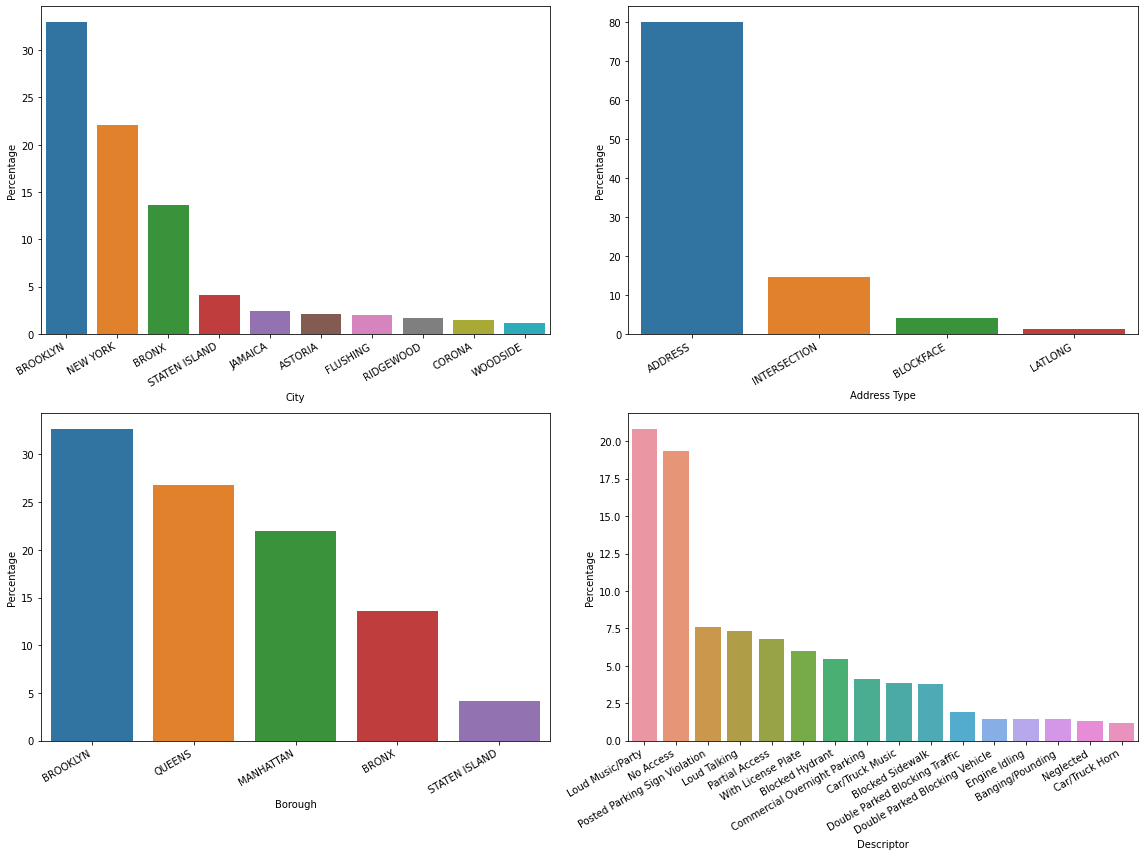

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

city = sns.barplot(ax=ax[0,0],x=NY311_city['City'],y=NY311_city.Percentage,)
city.set_xticklabels(city.get_xticklabels(), rotation=30, ha="right")

address_type = sns.barplot(ax=ax[0,1],x=NY311_address_type['Address Type'],y=NY311_address_type.Percentage,)
address_type.set_xticklabels(address_type.get_xticklabels(), rotation=30, ha="right")

borough = sns.barplot(ax=ax[1,0],x=NY311_Borough.Borough,y=NY311_Borough.Percentage,)
borough.set_xticklabels(borough.get_xticklabels(), rotation=30, ha="right")

descriptor = sns.barplot(ax=ax[1,1],x=NY311_Descriptor.Descriptor,y=NY311_Descriptor.Percentage,)
descriptor.set_xticklabels(descriptor.get_xticklabels(), rotation=30, ha="right")

plt.tight_layout()

## Comments on the data based on the analysis from the plots
* Broklyn city and Borough had the highest complaints 
* Most complaints occured at a given address
* Of all the incidents and complaints, loud music/party caused the biggest problem

In [22]:
# Converting the time ('timedelta64') to integer 

In [23]:
## No need of this way. See below a better way without needing to reload the data

#Let us re-load the data and convert the columns ‘Created Date’ and Closed Date’ 
#to datetime datatype and create a new column ‘Request_Closing_Time’ as the time
#df = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv", parse_dates=['Created Date', 'Closed Date'],
#                low_memory=False)

In [24]:
# df["Request_Closing_Time"] = df["Closed Date"] - df["Created Date"]

In [25]:
## Better way to do it
NY311['Closed Date'] = pd.to_datetime(NY311['Closed Date'])
NY311['Created Date'] = pd.to_datetime(NY311['Created Date'])

NY311['Request_Closing_Time'] = NY311['Closed Date'] - NY311['Created Date']

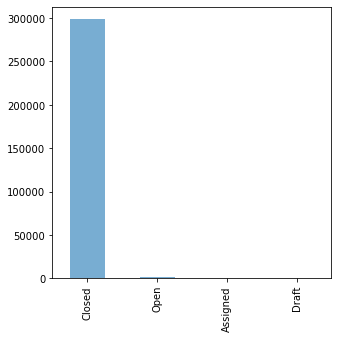

In [26]:
#Check the status of tickets
NY311['Status'].value_counts().plot(kind='bar',alpha=0.6,figsize=(5,5))
plt.show()

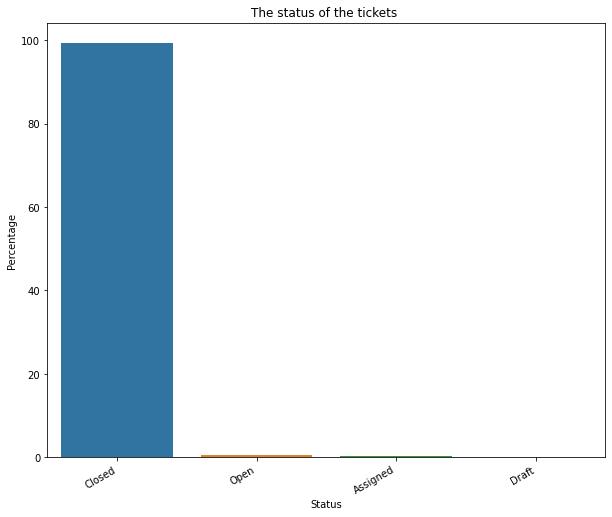

<Figure size 432x288 with 0 Axes>

In [27]:
plt.figure(figsize=(10,8))
#complainTicket_status
#Convert it to percentage
complaint_status = np.around(((NY311['Status'].value_counts()*100) / 
                                NY311['Status'].value_counts().sum()),decimals=3)
complaint_status = complaint_status.to_frame()
complaint_status = complaint_status.rename(columns={'Status':'Percentage'})
complaint_status['Status'] = complaint_status.index
cols = complaint_status.columns.tolist()
cols = cols[-1:]+cols[:-1]
complaint_status = complaint_status[cols]
#complaint_status = complaint_status[(complaint_status.Percentage) >= 1.0]
complaint_status = complaint_status.reset_index()
complaint_status = complaint_status.drop(columns=['index'],axis=1)
complaint_status

plot_status = sns.barplot(x=complaint_status['Status'],
                          y=complaint_status.Percentage,data=complaint_status)
plot_status.set_xticklabels(plot_status.get_xticklabels(), rotation=30, ha="right")
plt.title('The status of the tickets ')
plt.show()
plt.tight_layout()

In [28]:
NY311_City_RCTime = NY311[['City','Complaint Type','Request_Closing_Time']]
# Remove NaN from the above dtata
NY311_City_RCTime.dropna(subset = ['City','Complaint Type','Request_Closing_Time'], inplace = True)

#NY311_City_RCTime['Request_Closing_Time'] = pd.to_numeric(pd.to_datetime(NY311_City_RCTime['Request_Closing_Time']))

NY311_City_RCTime['Time(in_hr.)'] = np.around( (NY311_City_RCTime['Request_Closing_Time'].astype(np.int64)/
                                                      (pow(10,9)*3600) ), 3)
NY311_City_RCTime.head()
#NY311_City_RCTime

/home/chineduekuma/code/anaconda/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_22613/2575558156.py:7: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/tmp/ipykernel_22613/2575558156.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,City,Complaint Type,Request_Closing_Time,Time(in_hr.)
0,NEW YORK,Noise - Street/Sidewalk,0 days 00:55:15,0.921
1,ASTORIA,Blocked Driveway,0 days 01:26:16,1.438
2,BRONX,Blocked Driveway,0 days 04:51:31,4.859
3,BRONX,Illegal Parking,0 days 07:45:14,7.754
4,ELMHURST,Illegal Parking,0 days 03:27:02,3.451


## In order to draw some conclusions, we need to calculate some statistical parameters.

In [29]:
Average_time = np.around((NY311_City_RCTime['Time(in_hr.)'].mean()),decimals=3)
Median_val = np.around((NY311_City_RCTime['Time(in_hr.)'].median()),decimals=3)
Most_time = np.around((NY311_City_RCTime['Time(in_hr.)'].mode()),decimals=3)
std = np.around((NY311_City_RCTime['Time(in_hr.)'].std()),decimals=3)
# Print them out
print('================================================================================')
print('Average time laspse between logging complaint and resolving it is : ',Average_time, 'hour')
print('The median time to resolving a complaint is: ',Median_val, 'hour')
print('The most frequent time to resolving a complaint is : ',Most_time)#speed_to_resolve
print('The standard deviation in resolving a complaint is:  ',std)
print('================================================================================\n')

Average time laspse between logging complaint and resolving it is :  4.306 hour
The median time to resolving a complaint is:  2.71 hour
The most frequent time to resolving a complaint is :  0    0.6
dtype: float64
The standard deviation in resolving a complaint is:   6.078



## Inference from the above statistics
* From the statistics, we can infer that it took an average of 4.3 hours to resolve a complaint.
* On the flip side, the central time distribution (median) is 2.71 hours.
* However, the deviation spread is around 6 hours, which is significantly more than the median time.
* For practical consideration, the average time depicts more of the actual time it took to resolve a complaint.

### To make more sense out of the situation, let us categorize the time based on speed of response

In [30]:
speed_of_response = ['Super fast','Very fast','Fast','Normal','Slow','Super Slow']
response_condition = [NY311_City_RCTime['Time(in_hr.)'] <= 0.5,
                      (0.50 < NY311_City_RCTime['Time(in_hr.)']) & (NY311_City_RCTime['Time(in_hr.)'] <= 1.00),
                      (1.00 < NY311_City_RCTime['Time(in_hr.)']) & (NY311_City_RCTime['Time(in_hr.)'] <= 2.00),
                      (2.00 < NY311_City_RCTime['Time(in_hr.)']) & (NY311_City_RCTime['Time(in_hr.)'] <= 6.00),
                      (6.00 < NY311_City_RCTime['Time(in_hr.)']) & (NY311_City_RCTime['Time(in_hr.)'] <= 10.00),
                      (10.00 < NY311_City_RCTime['Time(in_hr.)'])]

NY311_City_RCTime['Speed Status'] = np.select(response_condition,speed_of_response)
NY311_City_RCTime.head()

/tmp/ipykernel_22613/1448363921.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,City,Complaint Type,Request_Closing_Time,Time(in_hr.),Speed Status
0,NEW YORK,Noise - Street/Sidewalk,0 days 00:55:15,0.921,Very fast
1,ASTORIA,Blocked Driveway,0 days 01:26:16,1.438,Fast
2,BRONX,Blocked Driveway,0 days 04:51:31,4.859,Normal
3,BRONX,Illegal Parking,0 days 07:45:14,7.754,Slow
4,ELMHURST,Illegal Parking,0 days 03:27:02,3.451,Normal


In [31]:
NY311_City_RCTime['Speed Status'].value_counts()

Normal        119070
Fast           58594
Slow           38096
Very fast      33432
Super Slow     24882
Super fast     23954
Name: Speed Status, dtype: int64

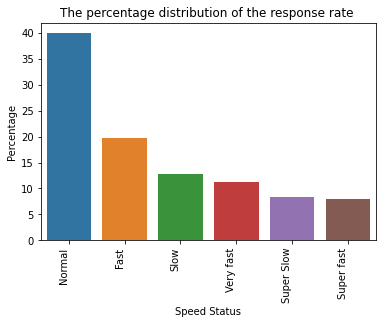

<Figure size 432x288 with 0 Axes>

In [32]:
# Plot to visualize them
speed_to_resolve = NY311_City_RCTime['Speed Status'].value_counts()
speed_to_resolve = speed_to_resolve.to_frame()
speed_to_resolve = speed_to_resolve.rename(columns={'Speed Status':'Counts'})
#speed_to_resolve
# Convert to %
speed_to_resolve['Percentage'] = np.around((speed_to_resolve.Counts/
                                            speed_to_resolve.Counts.sum())*100,decimals=3)

#speed_to_resolve = speed_to_resolve.to_frame()
speed_to_resolve = speed_to_resolve.rename(columns={'Speed Status':'Percentage'})
speed_to_resolve['Speed Status'] = speed_to_resolve.index
cols = speed_to_resolve.columns.tolist()
cols = cols[-1:]+cols[:-1]
speed_to_resolve = speed_to_resolve[cols]
speed_to_resolve = speed_to_resolve.reset_index()
speed_to_resolve = speed_to_resolve.drop(columns=['index'],axis=1)
#speed_to_resolve

plot_status = sns.barplot(x=speed_to_resolve['Speed Status'],
                          y=speed_to_resolve.Percentage,data=speed_to_resolve)
plot_status.set_xticklabels(plot_status.get_xticklabels(), rotation=90, ha="right")
plt.title('The percentage distribution of the response rate ')
plt.show()
plt.tight_layout()

### Inference from the above statistics
* We can infer that the time interval (expressed in different groups/status) to solve the problem 
is handled with normal response time. This is followed by fast response. 

### We still don't know if there is any pattern on how the complaints are lodged?
* Does the response pattern depend on a particular day, week or even month?

In [33]:
# We have to recast the dataset to contain Days and Months of complaint lodgement

Year_Month_Day = pd.to_datetime(NY311['Created Date'].dt.date)
Month_Day = pd.DataFrame()
Month_Day['Date'] = pd.to_datetime(Year_Month_Day.dt.date)
Month_Day['Month'] = Year_Month_Day.dt.month
Month_Day['Day'] = Year_Month_Day.dt.day
Month_Day['Month Name'] = Month_Day['Month'].apply(lambda x: calendar.month_abbr[x])
Month_Day['Day No'] = Month_Day['Date'].dt.weekday
Month_Day['Day Name'] = Month_Day['Day No'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',
                                                 5:'Friday',6:'Saturday'})
Month_Day.sample(10)

,Date,Month,Day,Month Name,Day No,Day Name
54917,2015-11-06,11,6,Nov,4,Thursday
34441,2015-11-26,11,26,Nov,3,Wednesday
220491,2015-06-13,6,13,Jun,5,Friday
291672,2015-04-09,4,9,Apr,3,Wednesday
138968,2015-08-23,8,23,Aug,6,Saturday
26609,2015-12-05,12,5,Dec,5,Friday
155476,2015-08-08,8,8,Aug,5,Friday
26811,2015-12-04,12,4,Dec,4,Thursday
107244,2015-09-19,9,19,Sep,5,Friday
84069,2015-10-10,10,10,Oct,5,Friday


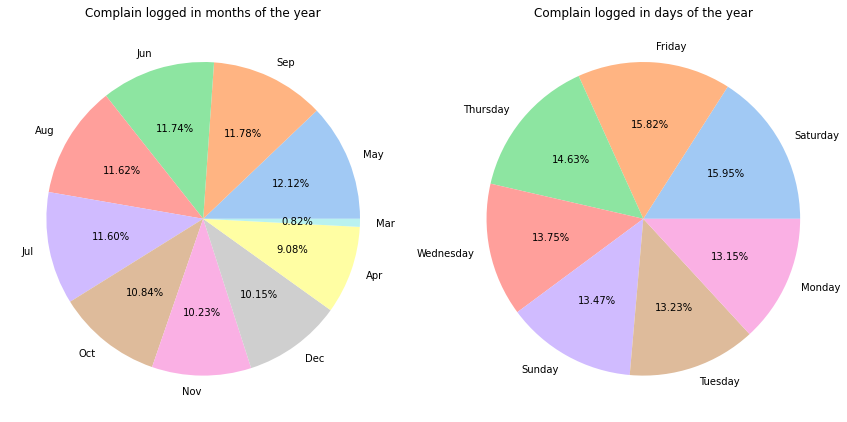

In [34]:
# Plot the month and day to visualize
Month_plot = Month_Day['Month Name'].value_counts()
Month_plot = Month_plot.to_frame()
Month_plot = Month_plot.rename(columns={'Month Name':'Counts'})
#Month_plot

Day_plot = Month_Day['Day Name'].value_counts()
Day_plot = Day_plot.to_frame()
Day_plot = Day_plot.rename(columns={'Day Name':'Counts'})
#Day_plot


fig, axes = plt.subplots(1,2, figsize=(12,8))
colors = sns.color_palette('pastel')#[0:100]

axes[0].pie(Month_plot['Counts'], colors=colors, labels = Month_plot.index,autopct='%1.2f%%')
axes[0].set_title('Complain logged in months of the year')

axes[1].pie(Day_plot['Counts'], colors=colors,labels = Day_plot.index,autopct='%1.2f%%')
axes[1].set_title('Complain logged in days of the year')

plt.tight_layout()

### Inference from the above statistics
* We see that the complaint logged in for both months and day are almost 
evenly distributed. No month or a day had a significant spike in complaints logged.
* But a careful look shows that complaints logded for Friday and Saturday are both more than 2% higher 
than the other days.
* This can be due to increased activities such as partying, 
visiting family members leading to increased traffic on the road that herald most weekends.
* For the months, we observe that March had very low complaints logged.

### To gain more insights
* Let us check the days of each month of the year.

In [35]:
Month_Day_grouped = Month_Day.groupby(['Month Name','Day Name'],as_index=False)['Day No'].count()
Month_Day_grouped_final = Month_Day_grouped.rename(columns={'Day No':'Counts'})
Month_Day_grouped_final.head(10)

,Month Name,Day Name,Counts
0,Apr,Friday,4227
1,Apr,Monday,3586
2,Apr,Saturday,4069
3,Apr,Sunday,3222
4,Apr,Thursday,3565
5,Apr,Tuesday,4313
6,Apr,Wednesday,4323
7,Aug,Friday,6913
8,Aug,Monday,3893
9,Aug,Saturday,6293


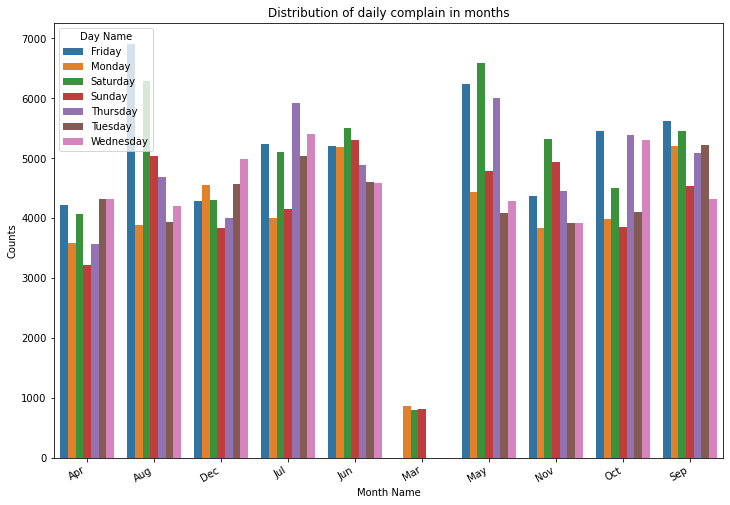

<Figure size 432x288 with 0 Axes>

In [36]:
# Plot to display
plt.figure(figsize=(12,8))

month_day_plot = sns.barplot(x=Month_Day_grouped_final['Month Name'], y=Month_Day_grouped_final['Counts'], 
                             hue=Month_Day_grouped_final['Day Name'], data=Month_Day_grouped_final)
month_day_plot.set_xticklabels(month_day_plot.get_xticklabels(), rotation=30, ha="right")
plt.title('Distribution of daily complain in months')
plt.show()
plt.tight_layout()

In [37]:
# Let's examine the month of March with the lowest compaints
Month_Day_grouped[Month_Day_grouped['Month Name'] == 'Mar']

,Month Name,Day Name,Day No
35,Mar,Monday,862
36,Mar,Saturday,802
37,Mar,Sunday,807


### So, only three days in the month of March contributed to all the complaints in March

## 4 
### Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations

In [38]:
# We have already done most of the heavy lifting for this before. 
# We just copy and modify from above
Complaint_City_AvgTime_grouped = NY311_City_RCTime.groupby(['City','Complaint Type']).agg({'Time(in_hr.)':'mean'})
Complaint_City_AvgTime_grouped = Complaint_City_AvgTime_grouped.rename(
    columns={'Time(in_hr.)':'Average Time(City, Complaint Type)'})
pd.set_option('display.max_rows', None) # Show all the rows
pd.set_option('display.max_columns', None) # Show all the columns
Complaint_City_AvgTime_grouped

Average Time(City, Complaint Type)
City                Complaint Type                                               
ARVERNE             Animal Abuse                                         2.153553
                    Blocked Driveway                                     2.526000
                    Derelict Vehicle                                     2.968148
                    Disorderly Youth                                     3.591500
                    Drinking                                             0.239000
                    Graffiti                                             1.533000
                    Homeless Encampment                                  1.814750
                    Illegal Parking                                      2.316310
                    Noise - Commercial                                   2.287000
                    Noise - House of Worship                             1.562273
                    Noise - Park                                         1.283500
                    Noise - Street/Sidewalk                              1.992345
                    Noise - Vehicle                                      1.859857
                    Panhandling                                          1.033000
                    Urinating in Public                                  0.692000
                    Vending                                              0.483000
ASTORIA             Animal Abuse                                         5.000184
                    Bike/Roller/Skate Chronic                            1.739533
                    Blocked Driveway                                     4.816111
                    Derelict Vehicle                                     9.689259
                    Disorderly Youth                                     2.902667
                    Drinking                                             4.722457
                    Graffiti                                            14.095000
                    Homeless Encampment                                  4.917625
                    Illegal Fireworks                                    2.773500
                    Illegal Parking                                      4.833403
                    Noise - Commercial                                   3.133028
                    Noise - House of Worship                             2.022158
                    Noise - Park                                         2.995098
                    Noise - Street/Sidewalk                              3.451158
                    Noise - Vehicle                                      3.509152
                    Panhandling                                          1.150000
                    Posting Advertisement                                5.870000
                    Traffic                                              5.410234
                    Urinating in Public                                  4.625667
                    Vending                                              4.935481
Astoria             Blocked Driveway                                     4.914638
                    Derelict Vehicle                                     6.236167
                    Illegal Parking                                      4.711291
                    Noise - Commercial                                   3.541908
                    Noise - Street/Sidewalk                              3.713246
BAYSIDE             Animal Abuse                                         3.274541
                    Blocked Driveway                                     2.563056
                    Derelict Vehicle                                     3.359803
                    Disorderly Youth                                     2.973000
                    Drinking                                             1.900000
                    Graffiti                                             4.551667
                    Homeless 

### 5. Perform a statistical test for the following:
** We define the Null and Alternate hypothesis. We then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.
* Whether the average response time across complaint types is similar or not (overall)
* Are the type of complaint or service requested and location related?
* Define Null Hypthesis as H0 and Alternative Hypothesis as H1

In [39]:
# Average response time for the various complaints. We have already done this above. Let's copy, paste, and display 

Complaint_AvgTime = NY311_City_RCTime.groupby(['Complaint Type']).agg({'Time(in_hr.)':'mean'})
Complaint_AvgTime = pd.DataFrame(Complaint_AvgTime)
Complaint_AvgTime = Complaint_AvgTime.sort_values(['Time(in_hr.)']).reset_index()
Complaint_AvgTime

,Complaint Type,Time(in_hr.)
0,Posting Advertisement,1.975802
1,Illegal Fireworks,2.761167
2,Noise - Commercial,3.136895
3,Noise - House of Worship,3.193296
4,Noise - Park,3.401709
5,Noise - Street/Sidewalk,3.438576
6,Traffic,3.446331
7,Disorderly Youth,3.558573
8,Noise - Vehicle,3.588590
9,Urinating in Public,3.626677


#### The report of Animal in a Park accounts for most of the complaints. 

## Hypothesis Test 
* Null Hypothesis: There is no significant relationship between the average response time and the complaint types

* Alternate Hypothesis: There is a significant relationship between the average response time and the complaint types


### Peform T-test analysis

#### (a) 1 - T-test (One sample T-test)

In [40]:
# We will focus on the most occurred complaint, which is Animal in a Park (AiP)
Tmean_without = float(Complaint_AvgTime[Complaint_AvgTime['Complaint Type']!='Animal in a Park'].mean())
Tmean_with = float(Complaint_AvgTime['Time(in_hr.)'].mean())
#Print them out
print("Without complaint type 'Animal in a Park' ----- ",Tmean_without)
print("With complaint type 'Animal in a Park' ----- ",Tmean_with)

Without complaint type 'Animal in a Park' -----  4.070125752977333
With complaint type 'Animal in a Park' -----  19.195801855114727


/tmp/ipykernel_22613/554473072.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [41]:
# With the Animal in a Park complaint
ttest_with_AiP, pvalue_with_AiP = stat.ttest_1samp(Complaint_AvgTime['Time(in_hr.)'], Tmean_with)
print('T-statistic is =',ttest_with_AiP)
print('p value is =',pvalue_with_AiP)

T-statistic is = 0.0
p value is = 1.0


In [42]:
if (pvalue_with_AiP<=0.05): #95% confidence interval
    print('H0 is rejected and H1 accepted since the p-value [{}] is less than 0.05'.format(np.around(pvalue_with_AiP,decimals=2)))
else:
    print('H0 is accepted and H1 rejected since the p-value [{}] is greater than 0.05'.format(np.around(pvalue_with_AiP,decimals=2)))

H0 is accepted and H1 rejected since the p-value [1.0] is greater than 0.05


### Without the Animal in a Park (AiP) complaint, i.e., we ignore this complaint 

In [43]:
Complaint_AvgTime_without_AiP = Complaint_AvgTime[Complaint_AvgTime['Complaint Type']!='Animal in a Park']
Complaint_AvgTime_without_AiP

,Complaint Type,Time(in_hr.)
0,Posting Advertisement,1.975802
1,Illegal Fireworks,2.761167
2,Noise - Commercial,3.136895
3,Noise - House of Worship,3.193296
4,Noise - Park,3.401709
5,Noise - Street/Sidewalk,3.438576
6,Traffic,3.446331
7,Disorderly Youth,3.558573
8,Noise - Vehicle,3.588590
9,Urinating in Public,3.626677


In [44]:
# We perform the same statistics as above
ttest_without_AiP, pvalue_without_AiP = stat.ttest_1samp(Complaint_AvgTime_without_AiP['Time(in_hr.)'], Tmean_without)
print('T-statistic is =',ttest_without_AiP)
print('p value is =',pvalue_without_AiP)

T-statistic is = 3.2105483841881714e-15
p value is = 0.9999999999999974


In [45]:
print('------------------------------------------------------------------------------')
if (ttest_without_AiP<=0.05):
    print('H0 is rejected and H1 accepted since the p-value [{}] is less than 0.05'.format(np.around(pvalue_without_AiP,decimals=2)))
else:
    print('H0 is accepted and H1 rejected since the p-value [{}] is greater than 0.05'.format(np.around(pvalue_without_AiP,decimals=2)))
print('------------------------------------------------------------------------------')

------------------------------------------------------------------------------
H0 is rejected and H1 accepted since the p-value [1.0] is less than 0.05
------------------------------------------------------------------------------


### Conclusion
* With or Without the most occured complaints (Animal in a Park), the H0 is accepted

### (b) Two-sample T-test

In [46]:
t1 = Complaint_AvgTime.sample(frac=.5)
t2 = Complaint_AvgTime.drop(t1.index)
t1

,Complaint Type,Time(in_hr.)
7,Disorderly Youth,3.558573
16,Illegal Parking,4.486004
1,Illegal Fireworks,2.761167
6,Traffic,3.446331
2,Noise - Commercial,3.136895
17,Blocked Driveway,4.738187
21,Animal in a Park,336.835000
13,Squeegee,4.045750
18,Animal Abuse,5.213475
12,Vending,4.013627


In [47]:
t2

,Complaint Type,Time(in_hr.)
0,Posting Advertisement,1.975802
3,Noise - House of Worship,3.193296
4,Noise - Park,3.401709
5,Noise - Street/Sidewalk,3.438576
8,Noise - Vehicle,3.588590
9,Urinating in Public,3.626677
10,Bike/Roller/Skate Chronic,3.756538
11,Drinking,3.855359
14,Homeless Encampment,4.365993
15,Panhandling,4.372764


In [48]:
print('------------------------------------------------------------------------------')
print('Mean of the first sample is: ',np.around(float(t1['Time(in_hr.)'].mean()),decimals=3))
print('Standard deviation of first sample is: ',np.around(float(t1['Time(in_hr.)'].std()),decimals=3))
print('Mean of the second sample is: ',np.around(float(t2['Time(in_hr.)'].mean()),decimals=3))
print('Standard deviation of the second sample is: ',np.around(float(t2['Time(in_hr.)'].std()),decimals=3))
print('------------------------------------------------------------------------------')

------------------------------------------------------------------------------
Mean of the first sample is:  34.49
Standard deviation of first sample is:  100.284
Mean of the second sample is:  3.902
Standard deviation of the second sample is:  1.31
------------------------------------------------------------------------------


In [49]:
ttest_2sp, p_val = stat.ttest_ind(t1['Time(in_hr.)'],t2['Time(in_hr.)'])
print('T-statistic is =',ttest_2sp)
print('p-value is =',np.around(p_val,decimals=3))

T-statistic is = 1.011522960565851
p-value is = 0.324


In [50]:
if (p_val<0.05):
    print('H0 is rejected since the p-value [{}] is less than 0.05'.format(np.around(p_val,decimals=3)))
else:
    print('H0 is accepted since p-value [{}] is greater than 0.05'.format(np.around(p_val,decimals=3)))


H0 is accepted since p-value [0.324] is greater than 0.05


#### 2. One way F-test (ANOVA)

In [51]:
# We share the data randomly into 3
t1_anova = Complaint_AvgTime.sample(frac=1/3)
t1_anova

,Complaint Type,Time(in_hr.)
16,Illegal Parking,4.486004
13,Squeegee,4.045750
6,Traffic,3.446331
20,Derelict Vehicle,7.346090
19,Graffiti,7.151239
3,Noise - House of Worship,3.193296
11,Drinking,3.855359


In [52]:
rest_of_data = Complaint_AvgTime.drop(t1_anova.index)
rest_of_data

,Complaint Type,Time(in_hr.)
0,Posting Advertisement,1.975802
1,Illegal Fireworks,2.761167
2,Noise - Commercial,3.136895
4,Noise - Park,3.401709
5,Noise - Street/Sidewalk,3.438576
7,Disorderly Youth,3.558573
8,Noise - Vehicle,3.588590
9,Urinating in Public,3.626677
10,Bike/Roller/Skate Chronic,3.756538
12,Vending,4.013627


In [53]:
t2_anova = rest_of_data.sample(frac=1/2)
t2_anova

,Complaint Type,Time(in_hr.)
1,Illegal Fireworks,2.761167
14,Homeless Encampment,4.365993
10,Bike/Roller/Skate Chronic,3.756538
0,Posting Advertisement,1.975802
7,Disorderly Youth,3.558573
9,Urinating in Public,3.626677
5,Noise - Street/Sidewalk,3.438576
2,Noise - Commercial,3.136895


In [54]:
t3_anova = rest_of_data.drop(t2_anova.index)
t3_anova

,Complaint Type,Time(in_hr.)
4,Noise - Park,3.401709
8,Noise - Vehicle,3.588590
12,Vending,4.013627
15,Panhandling,4.372764
17,Blocked Driveway,4.738187
18,Animal Abuse,5.213475
21,Animal in a Park,336.835000


In [55]:
# Print some of their statistics
print('------------------------------------------------------------------------------')
print('Mean of 1st sample =',np.around(float(t1_anova['Time(in_hr.)'].mean()),decimals=3))
print('Standard deviaton of 1st sample =',np.around(float(t1_anova['Time(in_hr.)'].std()),decimals=3))
print('Mean of 2nd sample =',np.around(float(t2_anova['Time(in_hr.)'].mean()),decimals=3))
print('Standard deviaton of 2nd sample =',np.around(float(t2_anova['Time(in_hr.)'].std()),decimals=3))
print('Mean of 3rd sample =',np.around(float(t3_anova['Time(in_hr.)'].mean()),decimals=3))
print('Standard deviaton of 3rd sample =',np.around(float(t3_anova['Time(in_hr.)'].std()),decimals=3))
print('------------------------------------------------------------------------------')

------------------------------------------------------------------------------
Mean of 1st sample = 4.789
Standard deviaton of 1st sample = 1.731
Mean of 2nd sample = 3.328
Standard deviaton of 2nd sample = 0.717
Mean of 3rd sample = 51.738
Standard deviaton of 3rd sample = 125.718
------------------------------------------------------------------------------


### One way ANOVA

In [56]:
f_val,p_val = stat.f_oneway(t1_anova['Time(in_hr.)'],t2_anova['Time(in_hr.)'],t3_anova['Time(in_hr.)'])
print('------------------------------------------------------------------------------')
print('The F-statistic is =',f_val)
print('The p-value is =',np.around(p_val,decimals=2))
print('------------------------------------------------------------------------------')

------------------------------------------------------------------------------
The F-statistic is = 1.0897131393610022
The p-value is = 0.36
------------------------------------------------------------------------------


In [57]:
if (p_val<0.05):
    print('H0 is rejected since p value [{}] is less than 0.05'.format(np.around(p_val,decimals=3)))
else:
    print('H0 is accepted since p value [{}] is greater than 0.05'.format(np.around(p_val,decimals=3)))

H0 is accepted since p value [0.356] is greater than 0.05


### Levene variance test

In [58]:
f_val,p_val = stat.levene(t1_anova['Time(in_hr.)'],t2_anova['Time(in_hr.)'],t3_anova['Time(in_hr.)'])
print('------------------------------------------------------------------------------')
print('F-statistic is =',f_val)
print('p value is =',np.around(p_val,decimals=3))
print('------------------------------------------------------------------------------')

------------------------------------------------------------------------------
F-statistic is = 1.0669180176930737
p value is = 0.364
------------------------------------------------------------------------------


### Inference from the Levene variance test
* Again, the p-value is greater than 0.05
* We accept the Null Hypothesis H0
* The samples have the same varience

## Conclusion from the overall analysis of the complaint type and time
* In all the tests we performed, the Null Hypothesis is accepted. 
* Thus we conclude that there is no significant relationship between the average response time and the complaint types.


## Final test -Let's check if there is any relation between the type of complaint or service requested and location related?

In [59]:
# First, let's check if there is any NaN and find a way to remove such 
print('Null data in Complaint Type =',NY311['Complaint Type'].isnull().any())
print('Null data in City =',NY311['City'].isnull().any())

Null data in Complaint Type = False
Null data in City = True


In [60]:
print('Null data in Complaint Type =',NY311['Complaint Type'].isnull().sum())
print('Null data in City =',NY311['City'].isnull().sum())

Null data in Complaint Type = 0
Null data in City = 2614


In [61]:
# We drop the Null data in City column
NY311_city = NY311[['Complaint Type','City']].dropna()

In [62]:
City_Complaints = pd.crosstab(NY311['Complaint Type'],NY311['City'],margins=True, margins_name='Total')
City_Complaints.head(10)

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,COLLEGE POINT,CORONA,EAST ELMHURST,ELMHURST,East Elmhurst,FAR ROCKAWAY,FLORAL PARK,FLUSHING,FOREST HILLS,FRESH MEADOWS,GLEN OAKS,HOLLIS,HOWARD BEACH,Howard Beach,JACKSON HEIGHTS,JAMAICA,KEW GARDENS,LITTLE NECK,LONG ISLAND CITY,Long Island City,MASPETH,MIDDLE VILLAGE,NEW HYDE PARK,NEW YORK,OAKLAND GARDENS,OZONE PARK,QUEENS,QUEENS VILLAGE,REGO PARK,RICHMOND HILL,RIDGEWOOD,ROCKAWAY PARK,ROSEDALE,SAINT ALBANS,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside,Total
Complaint Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Animal Abuse,38,125,0,37,7,2,1415,2394,11,0,28,61,59,38,0,89,2,143,45,45,5,33,31,0,42,229,19,15,30,0,36,22,1,1525,19,48,0,66,26,32,117,30,33,30,55,26,24,557,35,28,45,69,0,7767
Animal in a Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Bike/Roller/Skate Chronic,0,15,0,0,1,0,20,111,0,0,0,0,1,2,0,0,0,3,5,0,0,0,1,0,2,2,0,0,3,0,1,1,0,225,2,1,0,0,0,0,3,0,2,0,1,1,0,7,2,4,2,4,0,422
Blocked Driveway,35,2618,116,377,95,3,12755,28148,147,0,435,2761,1408,1446,0,284,20,2795,663,503,30,342,167,1,568,2818,313,121,772,34,732,457,53,2072,132,1259,2,585,611,872,1694,70,211,244,942,1548,262,2142,206,208,1060,1613,11,76761
Derelict Vehicle,27,351,12,198,89,3,1953,5181,115,0,184,57,113,78,1,187,56,440,52,291,49,143,138,0,29,954,14,61,195,4,434,296,14,537,86,420,1,370,81,167,330,9,208,202,358,289,210,1766,10,227,308,247,2,17547
Disorderly Youth,2,3,0,1,2,0,63,72,0,0,1,6,1,2,0,1,1,2,1,0,0,1,1,0,0,8,0,2,1,0,2,0,0,69,1,4,0,0,0,0,3,4,0,1,2,2,0,23,2,1,0,1,0,286
Drinking,1,35,0,1,1,1,188,257,0,0,0,33,9,13,0,4,1,40,1,2,0,3,4,0,9,34,1,1,7,0,9,2,0,295,1,19,0,5,4,9,10,20,2,3,13,23,6,175,10,2,3,15,0,1272
Graffiti,1,4,0,3,0,0,9,43,0,0,1,2,3,0,0,0,0,4,3,0,0,0,0,0,0,3,0,0,2,0,0,0,0,22,0,0,0,1,1,1,2,0,1,0,0,0,0,2,1,1,0,3,0,113
Homeless Encampment,4,32,0,2,1,0,247,857,5,0,3,19,2,32,0,14,0,26,18,5,0,9,3,0,11,79,5,0,10,0,10,5,0,2775,1,6,2,15,6,28,23,4,4,8,4,11,5,71,11,0,9,33,0,4415


In [63]:
# Some of the cities are typed in all caps and all smalls. Let's merge those cases into one
City_Complaints['ASTORIA CITY'] = City_Complaints['ASTORIA'].astype(int) + City_Complaints['Astoria'].astype(int)

In [64]:
#City_Complaints["ComASTORIA"] = City_Complaints["ASTORIA"].astype(str) + City_Complaints["Astoria"].astype(str) 
City_Complaints['EAST ELMHURST CITY'] = City_Complaints['EAST ELMHURST'].astype(int) + City_Complaints['East Elmhurst'].astype(int)

In [65]:
City_Complaints['HOWARD BEACH CITY'] = City_Complaints['HOWARD BEACH'].astype(int) + City_Complaints['Howard Beach'].astype(int)

In [66]:
City_Complaints['LONGISLAND CITY'] = City_Complaints['LONG ISLAND CITY'].astype(int) + City_Complaints['Long Island City'].astype(int)

In [67]:
City_Complaints['WOODSIDE CITY'] = City_Complaints['WOODSIDE'].astype(int) + City_Complaints['Woodside'].astype(int)

In [68]:
pd.set_option('display.max_rows', None) # Show all the rows
pd.set_option('display.max_columns', None) # Show all the columns
#train = pd.DataFrame(np.hstack([City_Complaints['WOODSIDE'],City_Complaints['Woodside']]))
City_Complaints.head(22)

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,COLLEGE POINT,CORONA,EAST ELMHURST,ELMHURST,East Elmhurst,FAR ROCKAWAY,FLORAL PARK,FLUSHING,FOREST HILLS,FRESH MEADOWS,GLEN OAKS,HOLLIS,HOWARD BEACH,Howard Beach,JACKSON HEIGHTS,JAMAICA,KEW GARDENS,LITTLE NECK,LONG ISLAND CITY,Long Island City,MASPETH,MIDDLE VILLAGE,NEW HYDE PARK,NEW YORK,OAKLAND GARDENS,OZONE PARK,QUEENS,QUEENS VILLAGE,REGO PARK,RICHMOND HILL,RIDGEWOOD,ROCKAWAY PARK,ROSEDALE,SAINT ALBANS,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside,Total,ASTORIA CITY,EAST ELMHURST CITY,HOWARD BEACH CITY,LONGISLAND CITY,WOODSIDE CITY
Complaint Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Animal Abuse,38,125,0,37,7,2,1415,2394,11,0,28,61,59,38,0,89,2,143,45,45,5,33,31,0,42,229,19,15,30,0,36,22,1,1525,19,48,0,66,26,32,117,30,33,30,55,26,24,557,35,28,45,69,0,7767,125,59,31,30,69
Animal in a Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Bike/Roller/Skate Chronic,0,15,0,0,1,0,20,111,0,0,0,0,1,2,0,0,0,3,5,0,0,0,1,0,2,2,0,0,3,0,1,1,0,225,2,1,0,0,0,0,3,0,2,0,1,1,0,7,2,4,2,4,0,422,15,1,1,3,4
Blocked Driveway,35,2618,116,377,95,3,12755,28148,147,0,435,2761,1408,1446,0,284,20,2795,663,503,30,342,167,1,568,2818,313,121,772,34,732,457,53,2072,132,1259,2,585,611,872,1694,70,211,244,942,1548,262,2142,206,208,1060,1613,11,76761,2734,1408,168,806,1624
Derelict Vehicle,27,351,12,198,89,3,1953,5181,115,0,184,57,113,78,1,187,56,440,52,291,49,143,138,0,29,954,14,61,195,4,434,296,14,537,86,420,1,370,81,167,330,9,208,202,358,289,210,1766,10,227,308,247,2,17547,363,114,138,199,249
Disorderly Youth,2,3,0,1,2,0,63,72,0,0,1,6,1,2,0,1,1,2,1,0,0,1,1,0,0,8,0,2,1,0,2,0,0,69,1,4,0,0,0,0,3,4,0,1,2,2,0,23,2,1,0,1,0,286,3,1,1,1,1
Drinking,1,35,0,1,1,1,188,257,0,0,0,33,9,13,0,4,1,40,1,2,0,3,4,0,9,34,1,1,7,0,9,2,0,295,1,19,0,5,4,9,10,20,2,3,13,23,6,175,10,2,3,15,0,1272,35,9,4,7,15
Graffiti,1,4,0,3,0,0,9,43,0,0,1,2,3,0,0,0,0,4,3,0,0,0,0,0,0,3,0,0,2,0,0,0,0,22,0,0,0,1,1,1,2,0,1,0,0,0,0,2,1,1,0,3,0,113,4,3,0,2,3
Homeless Encampment,4,32,0,2,1,0,247,857,5,0,3,19,2,32,0,14,0,26,18,5,0,9,3,0,11,79,5,0,10,0,10,5,0,2775,1,6,2,15,6,28,23,4,4,8,4,11,5,71,11,0,9,33,0,4415,32,2,3,10,33


### Now, perform some ANOVA for the city pairs

In [69]:
print("For 'ARVERNE' and 'ASTORIA CITY' pair -------")
f_val,p_val = stat.f_oneway(City_Complaints['ARVERNE'],City_Complaints['ASTORIA CITY'])
print('F-statistic is =',f_val)
print('p-value is =',np.around(p_val,decimals=2))

For 'ARVERNE' and 'ASTORIA CITY' pair -------
F-statistic is = 3.3610901859947915
p-value is = 0.07


In [70]:
print("For 'ARVERNE' and 'BROOKLYN' pair -------")
f_val,p_val = stat.f_oneway(City_Complaints['ARVERNE'],City_Complaints['BROOKLYN'])
print('F-statistic is =',f_val)
print('p-value is =',np.around(p_val,decimals=2))

For 'ARVERNE' and 'BROOKLYN' pair -------
F-statistic is = 3.716772993046823
p-value is = 0.06


In [71]:
print("For 'ASTORIA CITY' and 'BROOKLYN' pair -------")
f_val,p_val = stat.f_oneway(City_Complaints['ASTORIA CITY'],City_Complaints['BROOKLYN'])
print('F-statistic is =',f_val)
print('p-value is =',np.around(p_val,decimals=2))

For 'ASTORIA CITY' and 'BROOKLYN' pair -------
F-statistic is = 3.200279567223487
p-value is = 0.08


In [72]:
print("For 'ASTORIA CITY' and 'EAST ELMHURST CITY' pair -------")
f_val,p_val = stat.f_oneway(City_Complaints['ASTORIA CITY'],City_Complaints['EAST ELMHURST CITY'])
print('F-statistic is =',f_val)
print('p-value is =',np.around(p_val,decimals=2))

For 'ASTORIA CITY' and 'EAST ELMHURST CITY' pair -------
F-statistic is = 1.1395001377891627
p-value is = 0.29


In [73]:
print("For 'HOWARD BEACH CITY' and 'EAST ELMHURST CITY' pair -------")
f_val,p_val = stat.f_oneway(City_Complaints['HOWARD BEACH CITY'],City_Complaints['EAST ELMHURST CITY'])
print('F-statistic is =',f_val)
print('p-value is =',np.around(p_val,decimals=2))

For 'HOWARD BEACH CITY' and 'EAST ELMHURST CITY' pair -------
F-statistic is = 1.2670448559157288
p-value is = 0.27


In [74]:
print("For 'LONGISLAND CITY	' and 'WOODSIDE CITY' pair -------")
f_val,p_val = stat.f_oneway(City_Complaints['LONGISLAND CITY'],City_Complaints['WOODSIDE CITY'])
print('F-statistic is =',f_val)
print('p-value is =',np.around(p_val,decimals=2))

For 'LONGISLAND CITY	' and 'WOODSIDE CITY' pair -------
F-statistic is = 0.20896305593398112
p-value is = 0.65


In [75]:
print("For 'LONGISLAND CITY	' and 'ASTORIA CITY' pair -------")
f_val,p_val = stat.f_oneway(City_Complaints['LONGISLAND CITY'],City_Complaints['ASTORIA CITY'])
print('F-statistic is =',f_val)
print('p-value is =',np.around(p_val,decimals=2))

For 'LONGISLAND CITY	' and 'ASTORIA CITY' pair -------
F-statistic is = 1.2779813682395718
p-value is = 0.26


### Some inferences
- Null Hypothesis (H0): There is no dependence or relation among the features
- Alternate Hypothesis (H1): There is a relation among the features

* The few pairs we have checked show a p-value that is all greater than 0.05. 
* This supports rejecting H0 and accepting H1
* However, to make a conclusive statement, we must do it for all the cities and for the 21 complaints. This seems a lot to do efficiently

- To gain more insight, we will be better off using Chi-square contingency test. 
* It gives the correlation between different features (here different cities) for a given complaint type.



In [76]:
chi2, p_val, df, expfrq = stat.chi2_contingency(City_Complaints)
print('Chi-square value', chi2)
print('P-value',p_val)
print('Degrees of freedom', df)

Chi-square value 125547.1530084141
P-value 0.0
Degrees of freedom 1276


In [77]:
print('------------------------------------------------------------------------------')
if (p_val<0.05):
    print('H0 is rejected since p-value [{}] is less than 0.05'.format(np.around(p_val,decimals=3)))
else:
    print('H0 is accepted since p-value [{}] is greater than 0.05'.format(np.around(p_val,decimals=3)))
print('------------------------------------------------------------------------------')

------------------------------------------------------------------------------
H0 is rejected since p-value [0.0] is less than 0.05
------------------------------------------------------------------------------


### Conclusion from the above analysis
* There is a significant relationship between the type of complaint or service requested and location.